In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
#load and reshape image data into training and testing datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [24]:
#split training data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [25]:
#scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
# Define a range of k values to iterate over
k_values = range(1, 100, 10)

# Create a list to store validation accuracies for each k value
val_accuracies = []

# Iterate over different k values
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict the labels for the validation set
    y_val_pred = knn.predict(X_val)

    # Calculate the accuracy of the classifier on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store the validation accuracy for the current k value
    val_accuracies.append(val_accuracy)

# Find the best k value based on the highest validation accuracy
best_k = k_values[np.argmax(val_accuracies)]
best_val_accuracy = max(val_accuracies)

print(val_accuracies)
print("Best k value:", best_k)
print("Validation Accuracy:", best_val_accuracy)

[0.3367, 0.3272, 0.317, 0.3135, 0.3076, 0.3044, 0.3006, 0.3011, 0.3002, 0.297]
Best k value: 1
Validation Accuracy: 0.3367


(0.0, 0.7123349999999999)

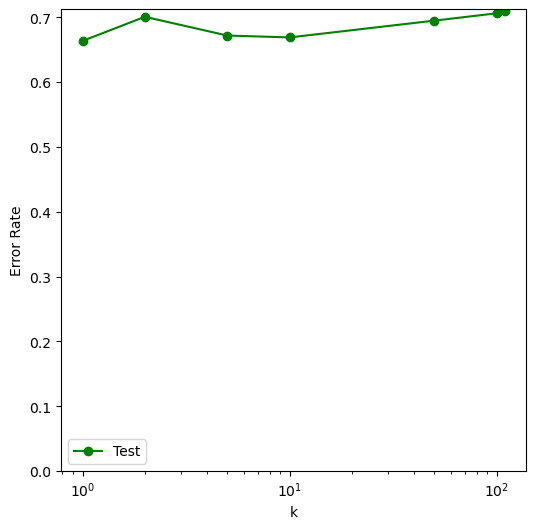

In [32]:
figure, axes = plt.subplots(1, figsize=(6,6))
k_vals = [1,2,5,10,50,100,110]

err_tr = np.zeros(len(k_vals))
err_te = np.zeros(len(k_vals))

for i, k in enumerate(k_vals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    yhat_tr = knn.predict(X_train)
    yhat_te = knn.predict(X_val)
    err_te[i] = 1. - accuracy_score(y_val, yhat_te)
axes.semilogx(k_vals, err_te, marker='o', c='green', label='Test')
axes.set_xlabel('k')
axes.set_ylabel('Error Rate')
axes.legend()
axes.set_ylim((0,None))

In [33]:
# Train the classifier with the best k value using the combined training and validation sets
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

# Predict the labels for the test set using the best k value
y_test_pred = knn_best.predict(X_test)

# Calculate the accuracy of the classifier on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.3562
